In [16]:
%load_ext autoreload
%autoreload 2
# dataset.py에서 파일 output하는 모듈 실행
from dataset import mergeForecastDataset
from dataset import addOutputDataset
from dataset import makeVisitor
from dataset import makeAtmosphere
from dataset import makeFinalResult
from dataset import fillDirtyData
from dataset import discretizeData
from dataset import encodingData

mergeForecastDataset()
addOutputDataset()
makeVisitor()
makeAtmosphere()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
      year  month  day  hour  forecast  value        date  addDate   timestamp
0     2009      1    1   200         4      0  2009-01-01        0  2009-01-01
1     2009      1    1   200         7      0  2009-01-01        0  2009-01-01
2     2009      1    1   200        10      0  2009-01-01        0  2009-01-01
3     2009      1    1   200        13      0  2009-01-01        0  2009-01-01
4     2009      1    1   500         4      0  2009-01-01        0  2009-01-01
...    ...    ...  ...   ...       ...    ...         ...      ...         ...
5467  2009      8   30  2300         4      0  2009-08-30        0  2009-08-30
5468  2009      8   30  2300         7      0  2009-08-30        0  2009-08-30
5469  2009      8   30  2300        10      0  2009-08-30        0  2009-08-30
5470  2009      8   30  2300        13      0  2009-08-30        0  2009-08-30
5471  2009      8   30  2300        16     

In [17]:
makeFinalResult()

            date  sulfur_dioxide_min  sulfur_dioxide_max  sulfur_dioxide_mean  \
0     2008-10-01               0.003               0.004             0.003333   
1     2008-10-02               0.002               0.008             0.004000   
2     2008-10-03               0.004               0.008             0.005042   
3     2008-10-04               0.004               0.008             0.005875   
4     2008-10-05               0.005               0.009             0.006458   
...          ...                 ...                 ...                  ...   
3946  2020-01-27                 NaN                 NaN                  NaN   
3947  2020-01-28                 NaN                 NaN                  NaN   
3948  2020-01-29                 NaN                 NaN                  NaN   
3949  2020-01-30                 NaN                 NaN                  NaN   
3950  2020-01-31                 NaN                 NaN                  NaN   

      sulfur_dioxide_median

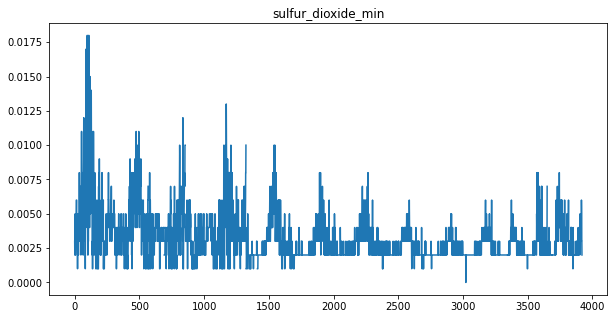

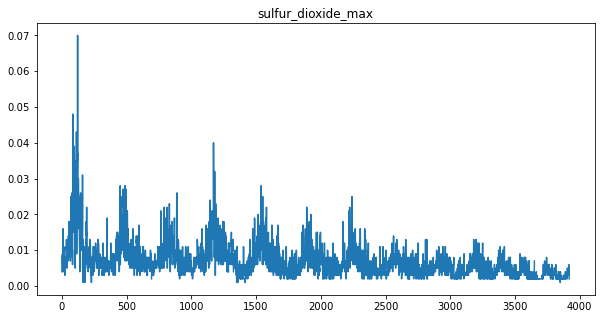

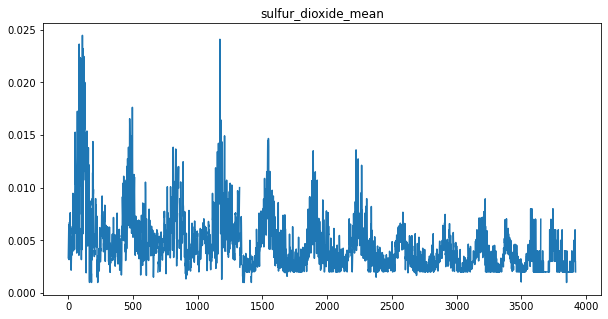

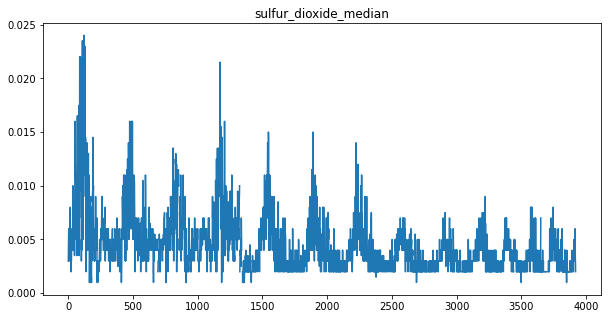

KeyError: 'sulfur_dioxide_std'

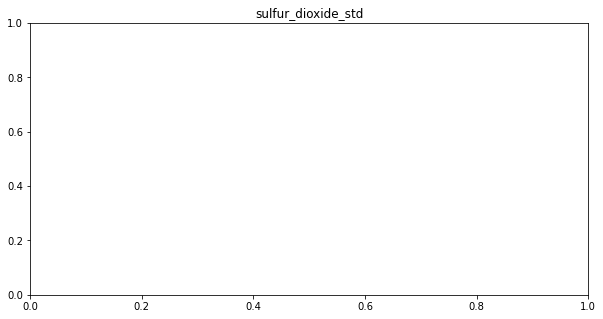

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('./assets/output/finalDataset.csv')

plt.figure(figsize=(10,5))
plt.title("sulfur_dioxide_min")
plt.plot(df['sulfur_dioxide_min'])

plt.figure(figsize=(10,5))
plt.title("sulfur_dioxide_max")
plt.plot(df["sulfur_dioxide_max"]) 

plt.figure(figsize=(10,5))
plt.title("sulfur_dioxide_mean")
plt.plot(df["sulfur_dioxide_mean"]) 

plt.figure(figsize=(10,5))
plt.title("sulfur_dioxide_median")
plt.plot(df["sulfur_dioxide_median"]) 
plt.show()

plt.figure(figsize=(10,5))
plt.title("sulfur_dioxide_std")
plt.plot(df["sulfur_dioxide_std"]) 
plt.show()

plt.figure(figsize=(10,5))
plt.title("carbon_monoxide_max")
plt.plot(df["carbon_monoxide_max"]) 
plt.show()


In [18]:
import pandas as pd
fillDirtyData()
discretizeData()
encodingData()

df = pd.read_csv('./assets/output/preprocessedDataset.csv')
print(df['visitor'])

0       11483.0
1       14012.0
2       58660.0
3       38961.0
4       34852.0
         ...   
3946     2236.0
3947      925.0
3948      757.0
3949     2013.0
3950      628.0
Name: visitor, Length: 3951, dtype: float64


In [124]:
# 이거 사용하면 성능이 더 떨어집니다. 주석 해놓고 필요할때 수정해서 쓰세요
# Feature reduction based on features characteristics
# from sklearn.decomposition import PCA

# df = pd.read_csv('./assets/output/preprocessedDataset.csv')
# target = df['visitor']
# date = df['date']
# df.drop(['date'], axis=1, inplace=True)

# characters = ['sulfur', 'carbon', 'nitrogen', 'ozone',  'pm10','rainfall', 'highest temperature', 'lowest temperature','precipitation', 'humidity']
# char_cols = [df.loc[:,df.columns.str.contains(char)]for char in characters]


# pca_results = pd.DataFrame()
# for idx, char_col in enumerate(char_cols):
#     pca = PCA(.95)
#     pca_result = pca.fit_transform(char_col)
#     pca_dataframe = pd.DataFrame(pca_result, columns=[characters[idx] +'_' + str(i) for i in range(pca_result.shape[1])])
#     # pca_dataframe.set_index(pca_dataframe.columns[0], inplace=True)
#     pca_results = pd.concat([pca_results, pca_dataframe], axis=1)

# print(pca_results)

# # for idx, pca_result in enumerate(pca_results):
# #     pca_df = pd.concat([pca_df, pca_result], axis=1)
# pca_df = pd.concat([date, pca_results,target], axis=1)

# pca_df.to_csv('./assets/output/pca.csv', index=False)

      sulfur_0  sulfur_1  carbon_0  carbon_1  nitrogen_0  nitrogen_1  \
0    -1.095433 -0.448566 -0.714159  1.526968   -0.214479    0.170451   
1    -0.278127  0.688212 -2.139045  1.194013    0.016164   -0.216518   
2     0.422814 -0.340931 -1.711301  0.128490   -0.076112   -1.265717   
3     0.822229 -0.310448 -1.425192  0.259266    0.131092   -0.298691   
4     1.226037 -0.675317 -1.299931  0.225970    0.174518    0.904115   
...        ...       ...       ...       ...         ...         ...   
3946  2.925178 -0.210542  1.757143  0.526936    0.412261   -0.120872   
3947  2.768109 -0.138540  1.820805  0.434330    1.095327   -0.180863   
3948  3.015068  0.080627  2.457631  0.657614    0.806882   -0.340892   
3949  3.953687  1.741454  2.607559  1.654633    0.403532   -0.098044   
3950  2.819820  0.228666  2.084528  0.563960    1.014508   -0.222885   

      nitrogen_2   ozone_0   ozone_1   ozone_2  ...  rainfall_2  \
0      -0.114668 -0.745515 -0.894313  0.589451  ...    0.087362   
1

In [125]:
# # Feature Selection based on correlation
# import numpy as np


# df = pd.read_csv('./assets/output/preprocessedDataset.csv')

# target = df['visitor']
# date = df['date'] 
# df.drop(['date'], axis=1, inplace=True)

# # Feature Selection based on correlation
# corr_target = df.corr(method='spearman').iloc[:,-1]
# corr_target = np.abs(corr_target)
# corr_target.drop('visitor', inplace=True)

# print(corr_target)

# threshold = 0.01  # 상관 관계의 임계값 설정
# highly_correlated_features = []
# for i,col in enumerate(corr_target):
#     if col > threshold:
#         highly_correlated_features.append(i)
        
# selected_features = df.iloc[:,highly_correlated_features]
# print(selected_features)
# result = pd.concat([date, selected_features, target], axis=1)
# result.to_csv('./assets/output/preprocessedDataset.csv', index=False)


In [126]:
# # Feature Selection based on PCA
# from sklearn.decomposition import PCA

# df = pd.read_csv('./assets/output/preprocessedDataset.csv')

# target = df['visitor']
# date = df['date'] 
# df.drop(['date', 'visitor'], axis=1, inplace=True)

# pca = PCA(.95)
# pca.fit(np.array(df, dtype=object))

# df_pca = pca.transform(df)
# df_pca = pd.DataFrame(df_pca)

# result = pd.concat([date, df_pca, target], axis=1)
# result.to_csv('./assets/output/preprocessedDataset.csv', index=False)